<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Shared Housing as a Solution to Intergenerational Homelessness in Camden City, Camden NJ**
Camden City with a poverty rate of 36%, contributes nearly 68% to the homeless population in New Jersey. According to recent estimates, Camden County's unsheltered homeless count has surged, with more than 84% of the county's unsheltered individuals residing in Camden City alone (U.S. Census Bureau, 2021; Monarch Housing, 2024).
Of particular concern is the demographic composition of Camden's homeless population, as 316 individuals fall within the 18 to 44 age range—a vibrant group whose potential contributions to economic development are hindered by the destabilizing effects of homelessness. The constant stress of survival in unstable housing situations leads to chronic physical and mental health conditions, low educational attainment, and difficulties in securing long-term employment (Shinn et al., 2005). The Corporation for Supportive Housing (2015) estimated that without intervention, 50% of those experiencing homelessness for the first time will have additional episodes.
This underscores the urgent need for innovative and proactive "prevention-as-cure" approaches to address this crisis to alter the trajectory of homelessness for future generations significantly.


**Research Objective**
To explre the potential of formal shared housing program for single adults at risk of homelessness in Camden, NJ.

In [3]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [4]:
#!python --version
gpd.__version__

'1.0.1'

**Symbiotic Relationship Between Poverty and Homlessness across New Jersey Counties.**

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


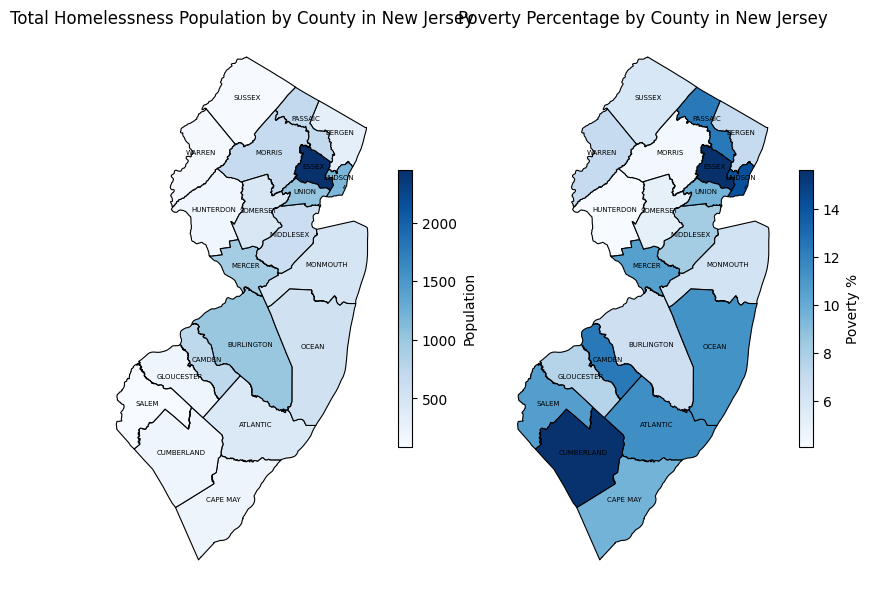

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load New Jersey counties shapefile
url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)
nj_counties = counties[counties['STATEFP'] == '34']  # Filter for NJ (FIPS code = 34)

# Load and clean Chronicity data
Chronicity = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/chronic.xlsx')
Chronicity['COUNTY'] = Chronicity['County'].str.upper().str.strip()  # Standardize County names

# Clean NJ counties data and prepare for merge
nj_counties['NAME'] = nj_counties['NAME'].str.replace("County", "").str.strip().str.upper()
nj_counties['COUNTY'] = nj_counties['NAME']

# Merge NJ counties with Chronicity data
njMerged = nj_counties.merge(Chronicity, on='COUNTY', how='outer', indicator=True)

# Ensure columns for plotting (Population and Poverty) are numeric
njMerged['population'] = pd.to_numeric(njMerged['population'], errors='coerce')
njMerged['poverty'] = pd.to_numeric(njMerged['poverty'], errors='coerce')

# Plot maps
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)

# First Map - Population by County
njMerged.plot(
    ax=axes[0], column='population', cmap='Blues',
    linewidth=0.8, edgecolor='black', legend=True,
    legend_kwds={'shrink': 0.5, 'label': 'Population'}
)
axes[0].set_title('Total Homelessness Population by County in New Jersey', fontsize=12)
axes[0].set_axis_off()

# Add county names on the first map (Population by County)
for _, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    axes[0].text(centroid.x, centroid.y, row['COUNTY'], fontsize=5, ha='center', color='black')

# Second Map - Poverty Percentage by County
njMerged.plot(
    ax=axes[1], column='poverty', cmap='Blues',
    linewidth=0.8, edgecolor='black', legend=True,
    legend_kwds={'shrink': 0.5, 'label': 'Poverty %'}
)
axes[1].set_title('Poverty Percentage by County in New Jersey', fontsize=12)
axes[1].set_axis_off()

# Add county names on the second map (Poverty Percentage by County)
for _, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    axes[1].text(centroid.x, centroid.y, row['COUNTY'], fontsize=5, ha='center', color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show();


### 5-Year Comparison of Total Homeless Population by Housing Situation across Canden County, New Jersey

**Total Homeless Population**

On the night of January 23, 2024, a total of 743 persons in 619 households were experiencing homelessness in Camden County. This Table shows that Camden County has seen an overall increase of 110 identified persons
(17%) from 2020 to 2024; and a gradual increase in population of unsheltered homeless persons between 2021 and 2024.  

Index(['Year', 'Emergency Shelter', 'Unsheltered', 'Transitional Housing',
       'Safe Haven', 'Total'],
      dtype='object')


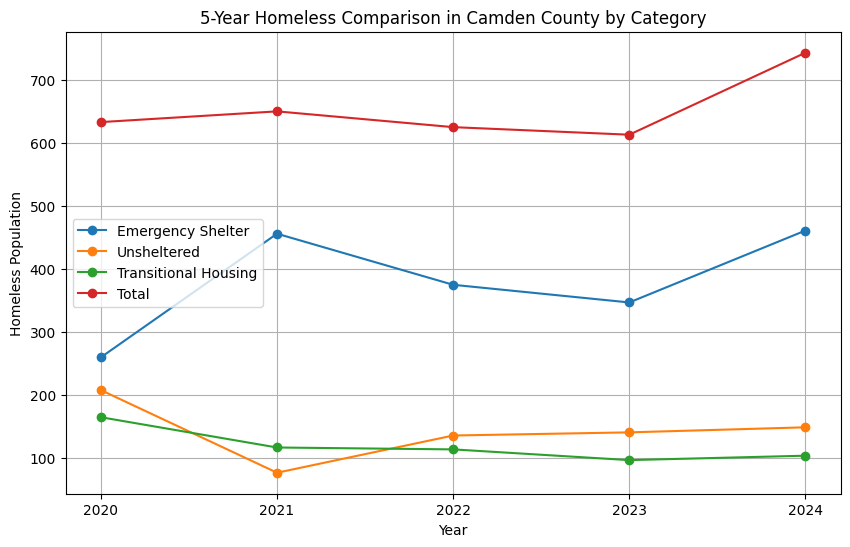

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the raw Excel file
CountyFive = pd.read_excel('https://raw.githubusercontent.com/Funmiadebajo/GIS/main/5%20year%20homeless%20comparison.xlsx', engine='openpyxl')

# Strip whitespace from the column names
CountyFive.columns = CountyFive.columns.str.strip()

# Convert the 'Year' column to integers
CountyFive['Year'] = CountyFive['Year'].astype(int)

# Check the cleaned column names
print(CountyFive.columns)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot each category against the Year
plt.plot(CountyFive['Year'], CountyFive['Emergency Shelter'], marker='o', label='Emergency Shelter')
plt.plot(CountyFive['Year'], CountyFive['Unsheltered'], marker='o', label='Unsheltered')
plt.plot(CountyFive['Year'], CountyFive['Transitional Housing'], marker='o', label='Transitional Housing')
plt.plot(CountyFive['Year'], CountyFive['Total'], marker='o', label='Total')

# Set titles and labels
plt.title('5-Year Homeless Comparison in Camden County by Category')
plt.xlabel('Year')
plt.ylabel('Homeless Population')
plt.xticks(CountyFive['Year'])  # Set x-ticks to be the year values
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


In [ ]:
#aok same thing below! slow down, have a look at merge, investigate!

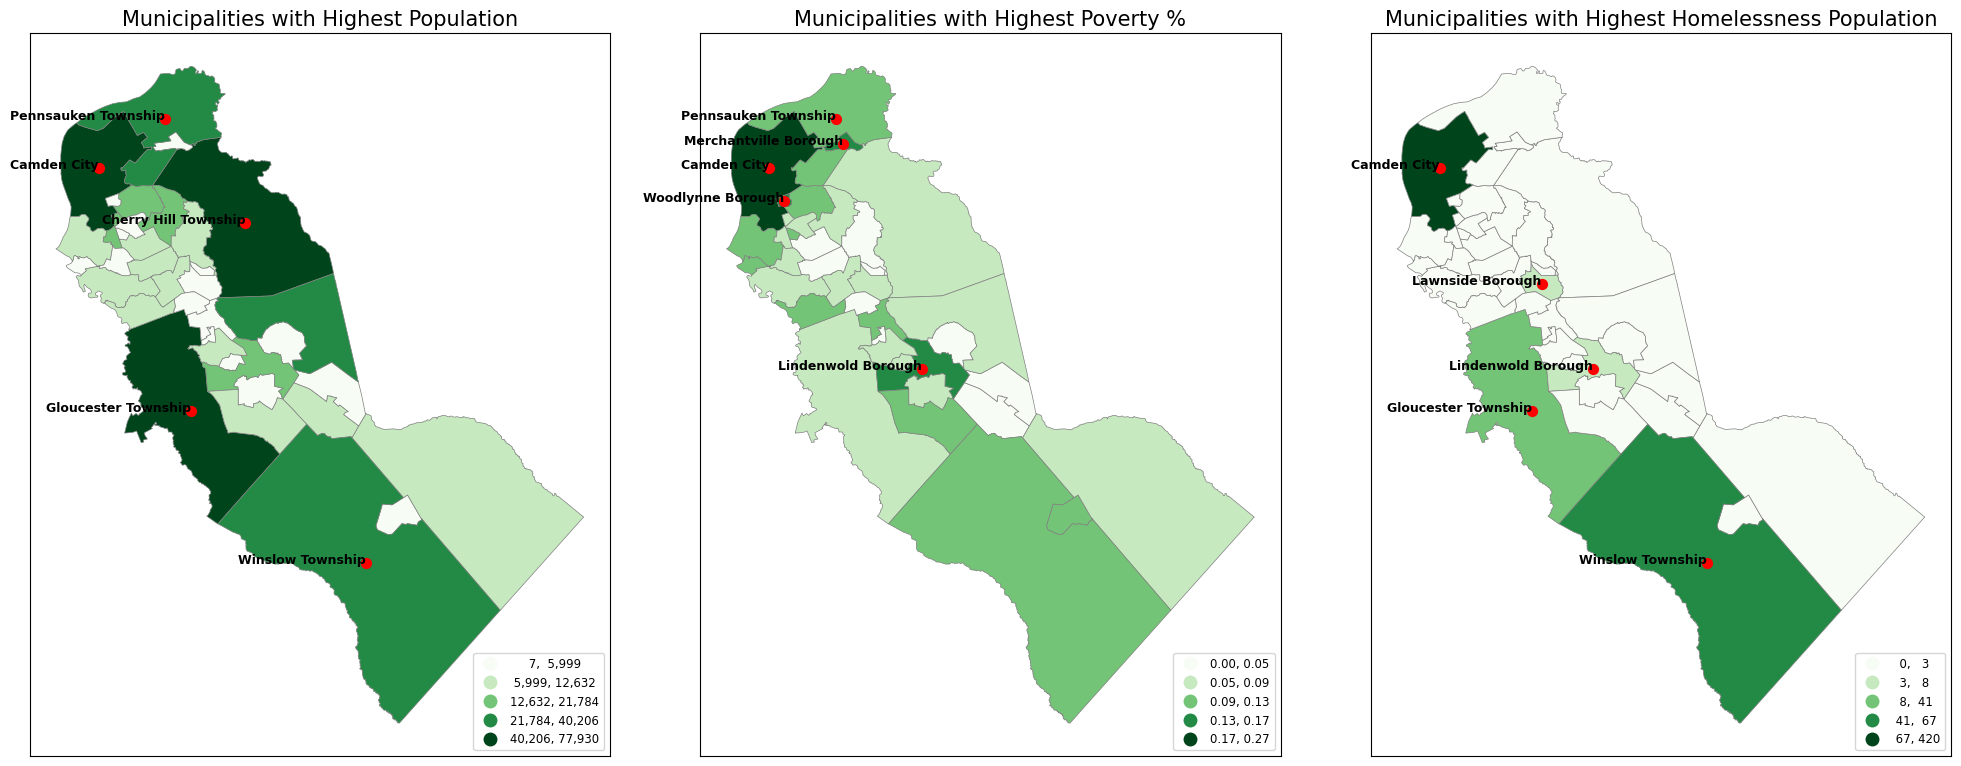

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Function to clean municipality names
def clean_municipality_names(df, col_name):
    df[col_name] = df[col_name].str.strip().str.lower()
    return df

# Load New Jersey municipalities shapefile
njMun = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)
njMun = clean_municipality_names(njMun, 'Municipality')  # Clean names

# Load population, homelessness, and poverty data
data_files = {
    "population": 'https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx',
    "homelessness": 'https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20homelessness.xlsx',
    "poverty": 'https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality%20poverty.xlsx'
}

# Merge all datasets into the municipalities GeoDataFrame with a custom indicator column name
for data_type, file_url in data_files.items():
    df = pd.read_excel(file_url)
    df = clean_municipality_names(df, 'Municipality')
    njMun = njMun.merge(df, on='Municipality', how='outer', indicator=f"{data_type}_merge")

# Function to create plots
def plot_map(ax, data, column, title, cmap, top_n=None, legend_fmt=None):
    """
    Generic function to plot a map with optional top N labels and custom legend formatting.
    """
    # Plot the data
    data.plot(
        ax=ax, column=column, legend=True, cmap=cmap, scheme='natural_breaks', k=5,
        edgecolor='grey', linewidth=0.5,
        legend_kwds={
            "fmt": legend_fmt if legend_fmt else "{:,.0f}",
            'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small'
        }
    )
    ax.set_title(title, fontsize=15)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

    # Label top N municipalities if specified
    if top_n:
        top_municipalities = data.nlargest(top_n, column)
        for _, row in top_municipalities.iterrows():
            centroid = row.geometry.centroid
            ax.scatter(centroid.x, centroid.y, color='red', s=50, zorder=5)  # Pin marker
            ax.text(
                centroid.x, centroid.y, row['Municipality'].title(),
                fontsize=9, ha='right', color='black', weight='bold', zorder=10
            )

# Create subplots for population, poverty, and homelessness maps
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plot the maps in the desired order
plot_map(axs[0], njMun, 'population', "Municipalities with Highest Population", 'Greens', top_n=5)
plot_map(axs[1], njMun, 'Poverty', "Municipalities with Highest Poverty %", 'Greens', top_n=5, legend_fmt="{:.2f}")
plot_map(axs[2], njMun, 'Homelessness', "Municipalities with Highest Homelessness Population", 'Greens', top_n=5)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
#aok: above need legend for each and interpret

Median Rental Price in Camden County increased by $200 in the last year, compared to the previous year.

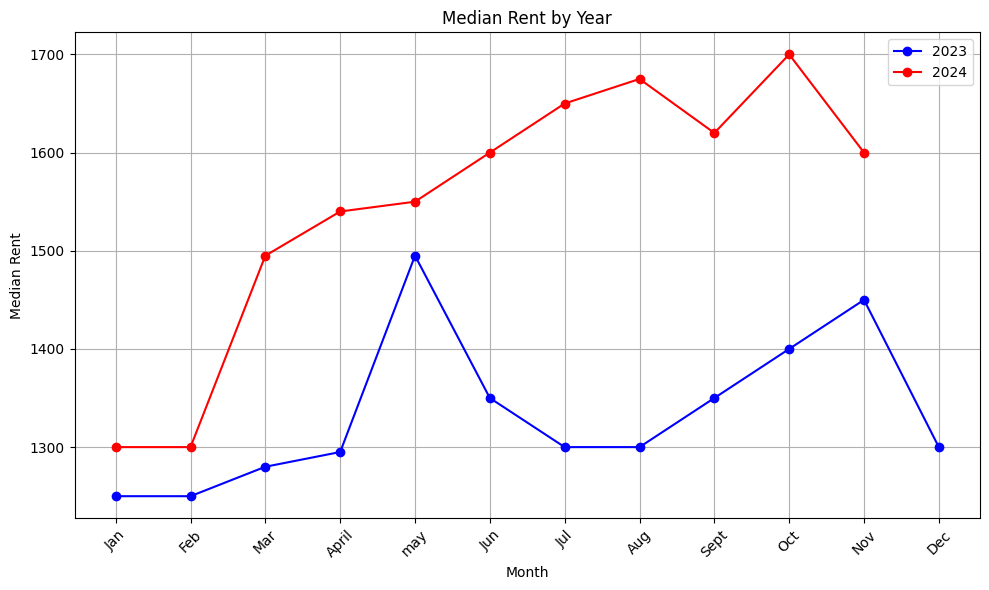

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided URL
data = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/median%20rental%20by%20year.xlsx')

# Plot a line graph
plt.figure(figsize=(10, 6))

# Plotting '2023' and '2024' median rent values against 'Month' (use integer column names)
plt.plot(data['Month'], data[2023], marker='o', linestyle='-', color='b', label='2023')
plt.plot(data['Month'], data[2024], marker='o', linestyle='-', color='r', label='2024')

# Adding labels and title
plt.title('Median Rent by Year')
plt.xlabel('Month')
plt.ylabel('Median Rent')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.tight_layout()
plt.show();


Homelessness is a function of income and housing

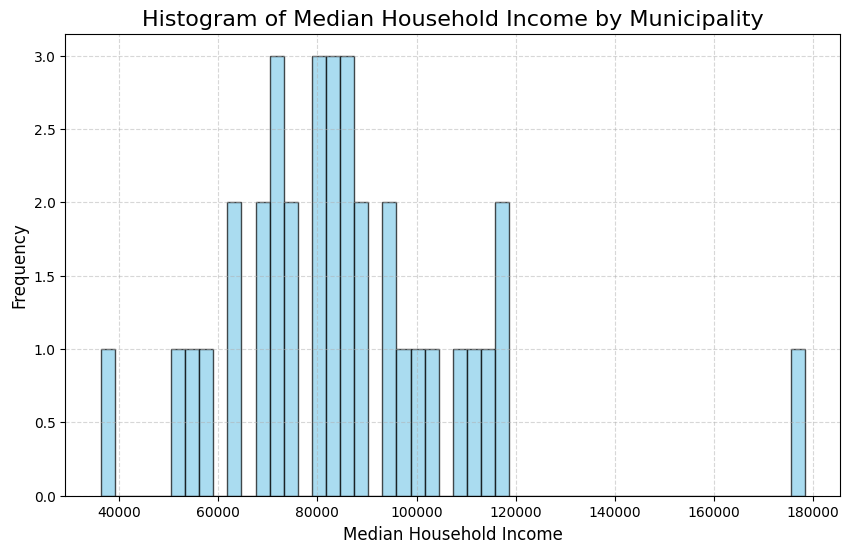

In [ ]:
# Load the data
median_income = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')


median_income['Median Household Income'] = median_income['Median Household Income'].replace({'\$': '', ',': ''}, regex=True) # Removing all symbols
median_income['Median Household Income'] = pd.to_numeric(median_income['Median Household Income'], errors='coerce')

# Drop rows with NaN values in the 'Median Household Income' column (if necessary)
median_income = median_income.dropna(subset=['Median Household Income'])

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram for 'Median Household Income'
median_income['Median Household Income'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Set the title and labels
plt.title('Histogram of Median Household Income by Municipality', fontsize=16)
plt.xlabel('Median Household Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show();


In [ ]:
#aok same thing below!! investigate merge like we did in class; split code to more cells; interpret maps
#the last map shows zero for each bin

**Load and Clean Data from Excel**

In [22]:

# Load and clean Rent Burden data
Rent_Burden = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
Rent_Burden['Rent Burden'] = Rent_Burden['Rent Burden'].replace({'%': '', ',': ''}, regex=True)
Rent_Burden['Rent Burden'] = pd.to_numeric(Rent_Burden['Rent Burden'], errors='coerce')
Rent_Burden = Rent_Burden.dropna(subset=['Rent Burden'])

# Load and clean Median Gross Rent data
MedGroRen = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
MedGroRen['Median Gross Rent'] = MedGroRen['Median Gross Rent'].replace({'\$': '', ',': ''}, regex=True)
MedGroRen['Median Gross Rent'] = pd.to_numeric(MedGroRen['Median Gross Rent'], errors='coerce')
MedGroRen = MedGroRen.dropna(subset=['Median Gross Rent'])

# Load and clean Median Household Income data
median_income = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
median_income['Median Household Income'] = median_income['Median Household Income'].replace({'\$': '', ',': ''}, regex=True)
median_income['Median Household Income'] = pd.to_numeric(median_income['Median Household Income'], errors='coerce')
median_income = median_income.dropna(subset=['Median Household Income'])

# Normalize Municipality names in Rent_Burden, MedGroRen, and median_income if necessary
Rent_Burden['Municipality'] = Rent_Burden['Municipality'].str.strip().str.lower()
MedGroRen['Municipality'] = MedGroRen['Municipality'].str.strip().str.lower()
median_income['Municipality'] = median_income['Municipality'].str.strip().str.lower()


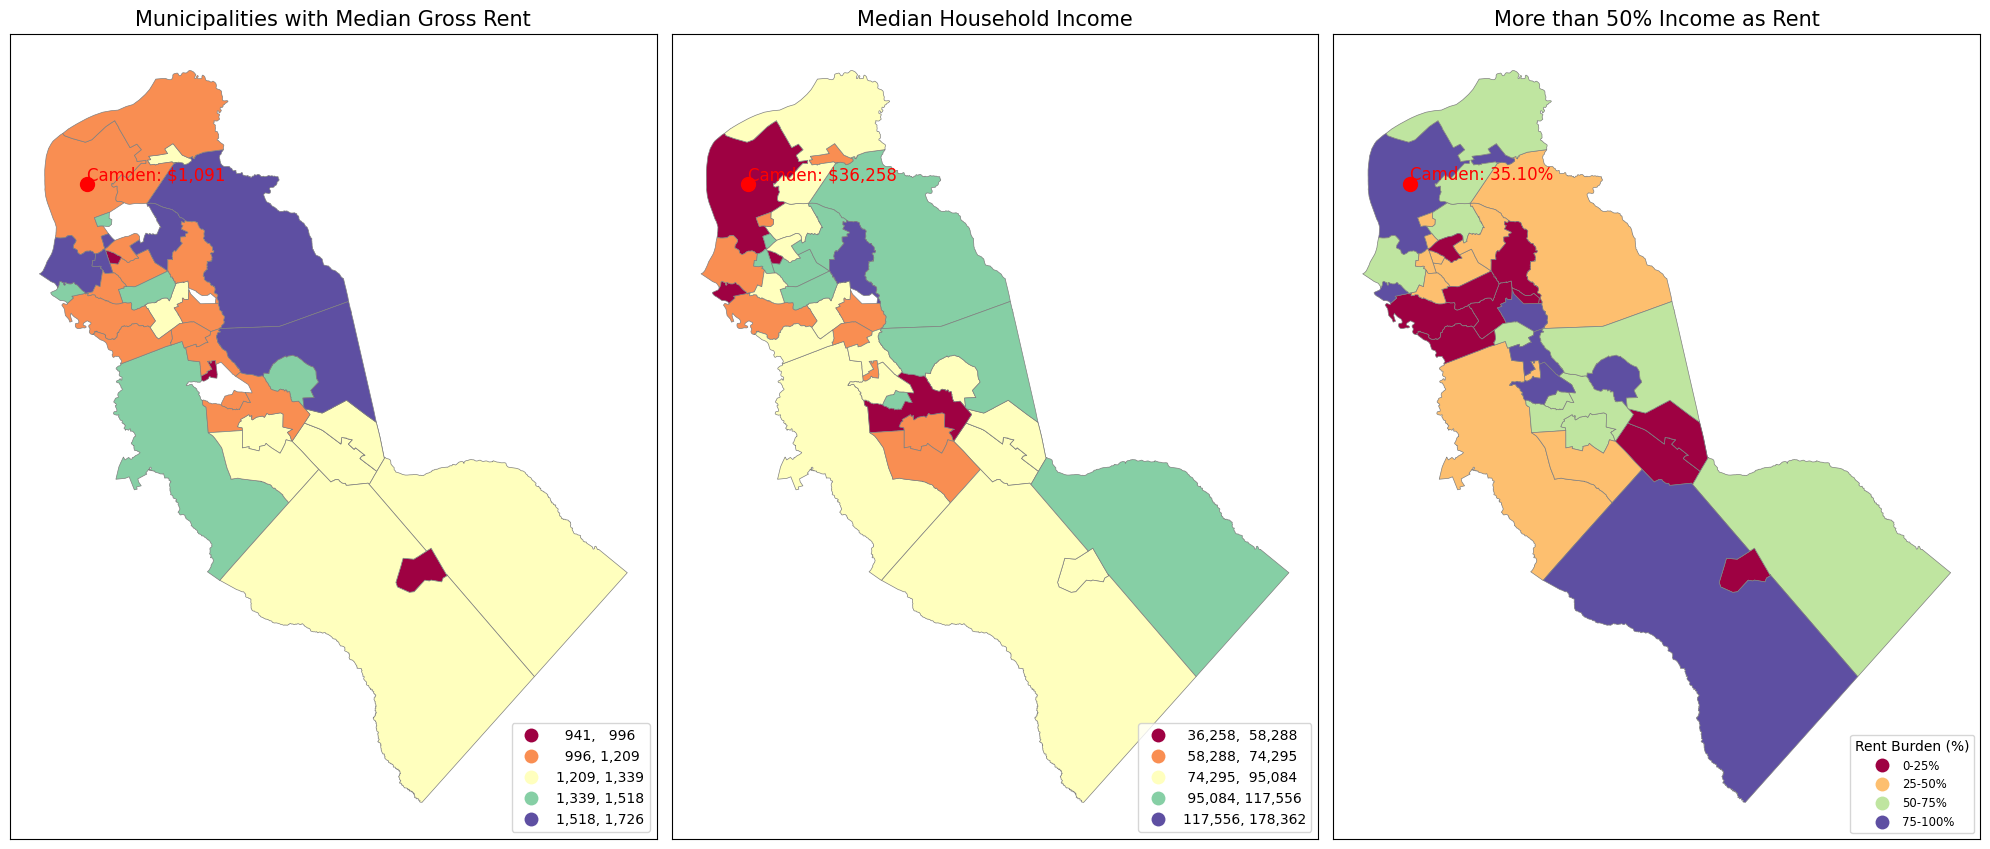

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Define custom function for cleaning municipality names
def clean_municipality_names(df, col_name):
    df[col_name] = df[col_name].str.strip().str.lower()
    return df

# Merge the data with the required instructions using 'outer' and 'indicator' merge
njMun4 = njMun.merge(Rent_Burden, on='Municipality', how='outer', indicator='rent_burden_merge')
njMun5 = njMun.merge(MedGroRen, on='Municipality', how='outer', indicator='median_rent_merge')
njMun6 = njMun.merge(median_income, on='Municipality', how='outer', indicator='median_income_merge')

# Coordinates for Camden (assume latitude and longitude or use a method to find them)
camden_coords = njMun[njMun['Municipality'] == 'camden'].geometry.centroid.iloc[0]

# Get Camden's values for each column
camden_rent = njMun5[njMun5['Municipality'] == 'camden']['Median Gross Rent'].values[0]
camden_income = njMun6[njMun6['Municipality'] == 'camden']['Median Household Income'].values[0]
camden_burden = njMun4[njMun4['Municipality'] == 'camden']['Rent Burden'].values[0]

# Create subplots for the three maps
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plot Median Gross Rent map (first map displayed) with consistent colormap
if njMun5['Median Gross Rent'].nunique() > 1:
    njMun5.plot(ax=axs[0], column='Median Gross Rent', legend=True, cmap='Spectral', scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun5.plot(ax=axs[0], column='Median Gross Rent', legend=True, cmap='Spectral', edgecolor='grey', linewidth=0.5)

# Highlight Camden on the first map with its value
axs[0].scatter(camden_coords.x, camden_coords.y, color='red', s=100, label='Camden', zorder=5)
axs[0].text(camden_coords.x + 0.01, camden_coords.y, f'Camden: ${camden_rent:,.0f}', color='red', fontsize=12, ha='left', va='bottom', zorder=5)

axs[0].set_title("Municipalities with Median Gross Rent", fontsize=15)
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Plot Median Household Income map (second map displayed) with consistent colormap
if njMun6['Median Household Income'].nunique() > 1:
    njMun6.plot(ax=axs[1], column='Median Household Income', legend=True, cmap='Spectral', scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun6.plot(ax=axs[1], column='Median Household Income', legend=True, cmap='Spectral', edgecolor='grey', linewidth=0.5)

# Highlight Camden on the second map with its value
axs[1].scatter(camden_coords.x, camden_coords.y, color='red', s=100, label='Camden', zorder=5)
axs[1].text(camden_coords.x + 0.01, camden_coords.y, f'Camden: ${camden_income:,.0f}', color='red', fontsize=12, ha='left', va='bottom', zorder=5)

axs[1].set_title("Median Household Income", fontsize=15)
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Plot Rent Burden map (last map displayed) with consistent colormap and improved breaks
if njMun4['Rent Burden'].nunique() > 1:
    # Use pandas qcut to create quantiles for Rent Burden map
    njMun4['Rent Burden Quantile'] = pd.qcut(njMun4['Rent Burden'], q=4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])

    # Plot Rent Burden with quantiles and the 'Spectral' colormap
    njMun4.plot(ax=axs[2], column='Rent Burden Quantile', legend=True, cmap='Spectral', edgecolor='grey', linewidth=0.5,
                legend_kwds={'title': 'Rent Burden (%)', 'loc': 'lower right', 'fontsize': 'small'})
else:
    njMun4.plot(ax=axs[2], column='Rent Burden', legend=True, cmap='Spectral', edgecolor='grey', linewidth=0.5)

# Highlight Camden on the third map with its value
axs[2].scatter(camden_coords.x, camden_coords.y, color='red', s=100, label='Camden', zorder=5)
axs[2].text(camden_coords.x + 0.01, camden_coords.y, f'Camden: {camden_burden*100:.2f}%', color='red', fontsize=12, ha='left', va='bottom', zorder=5)

axs[2].set_title("More than 50% Income as Rent", fontsize=15)
axs[2].set_xticks([])  # Remove x-axis ticks
axs[2].set_yticks([])  # Remove y-axis ticks

# Display the plot
plt.tight_layout()
plt.show();


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re
from matplotlib.colors import ListedColormap


In [26]:

# Load municipality data and clean names
njMun = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)
njMun.loc[:, 'Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Standardize and remove suffixes from municipality names
def clean_municipality_name(name):
    return re.sub(r'\s(Borough|Township|City|Village|Town)$', '', name, flags=re.IGNORECASE).strip().lower()

njMun['Municipality'] = njMun['Municipality'].apply(clean_municipality_name)

# Load and clean Vacancies data
Family_Households = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
Family_Households['Family Households'] = Vacancies['Family Households'].replace({'%': '', ',': ''}, regex=True)
Family_Households['Family Households'] = pd.to_numeric(Family_Households['Family Households'], errors='coerce')
Family_Households = Family_Households.dropna(subset=['Family Households'])

# Load and clean Non-Family Household data
Nonfamily_Households = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
Nonfamily_Households['Nonfamily Households'] = Nonfamily_Households['Nonfamily Households'].replace({'\$': '', ',': ''}, regex=True)
Nonfamily_Households['Nonfamily Households'] = pd.to_numeric(Nonfamily_Households['Nonfamily Households'], errors='coerce')
Nonfamily_Households = Nonfamily_Households.dropna(subset=['Actual Renters'])

# Load and clean Median Gross Rent data
MedGroRen = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
MedGroRen['Median Gross Rent'] = MedGroRen['Median Gross Rent'].replace({'\$': '', ',': ''}, regex=True)
MedGroRen['Median Gross Rent'] = pd.to_numeric(MedGroRen['Median Gross Rent'], errors='coerce')
MedGroRen = MedGroRen.dropna(subset=['Median Gross Rent'])

# Normalize Municipality names in Rent_Burden, MedGroRen, and median_income if necessary
Actual_Renters.loc[:, 'Municipality'] = Actual_Renters['Municipality'].str.strip().str.lower()
Vacancies.loc[:, 'Municipality'] = Vacancies['Municipality'].str.strip().str.lower()
MedGroRen.loc[:, 'Municipality'] = MedGroRen['Municipality'].str.strip().str.lower()

# Merge the data with njMun
njMun7 = njMun.merge(Vacancies, on='Municipality', how='left')
njMun8 = njMun.merge(Actual_Renters, on='Municipality', how='left')
njMun5 = njMun.merge(MedGroRen, on='Municipality', how='left')

# Define custom color map
custom_cmap = ListedColormap(['#ADD8E6', '#3CB371', '#4B0082'])

# Create subplots for the three maps
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plot Median Gross Rent map (now the first map displayed)
if njMun5['Median Gross Rent'].nunique() > 1:
    njMun5.plot(ax=axs[0], column='Median Gross Rent', legend=True, cmap=custom_cmap, scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun5.plot(ax=axs[0], column='Median Gross Rent', legend=True, cmap=custom_cmap, edgecolor='grey', linewidth=0.5)

# Annotate municipalities with the five highest values on the map
top_5_municipalities = njMun5.nlargest(5, 'Median Gross Rent')
for idx, row in top_5_municipalities.iterrows():
    axs[0].text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(), fontsize=10, ha='center', color='black')

axs[0].set_title("Municipalities with Median Gross Rent", fontsize=15)
axs[0].set_xticks([])
axs[0].set_yticks([])

# Plot Median Household Income map
if njMun7['Vacancies'].nunique() > 1:
    njMun7.plot(ax=axs[1], column='Vacancies', legend=True, cmap=custom_cmap, scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun7.plot(ax=axs[1], column='Vacancies', legend=True, cmap=custom_cmap, edgecolor='grey', linewidth=0.5)

# Annotate municipalities with the five highest values on the map
top_5_municipalities = njMun7.nlargest(5, 'Vacancies')
for idx, row in top_5_municipalities.iterrows():
    axs[1].text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(), fontsize=10, ha='center', color='black')

axs[1].set_title("Vacancies", fontsize=15)
axs[1].set_xticks([])
axs[1].set_yticks([])

# Plot Rent Burden map (now the last map displayed)
if njMun8['Actual Renters'].nunique() > 1:
    njMun8.plot(ax=axs[2], column='Actual Renters', legend=True, cmap=custom_cmap, scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun8.plot(ax=axs[2], column='Actual Renters', legend=True, cmap=custom_cmap, edgecolor='grey', linewidth=0.5)

# Annotate municipalities with the five highest values on the map
top_5_municipalities = njMun8.nlargest(5, 'Actual Renters')
for idx, row in top_5_municipalities.iterrows():
    axs[2].text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(), fontsize=10, ha='center', color='black')

axs[2].set_title("Renters between 2020 and 2023", fontsize=15)
axs[2].set_xticks([])
axs[2].set_yticks([])

# Display the plot
plt.tight_layout()
plt.show();


NameError: name 'Vacancies' is not defined

aok: yet again same thing above! and vacancies doesnt make sense buch of zeros, same for 3rd map!

**ASCERTAINING TH EFEASIBILITY AND ACCEPTANCE OF SHARED HOUSING IN CAMDEN NJ**

Critics of shared housing argue that it may not be effective for certain populations due to cultural and personal factors, especially in societies with a strong emphasis on individualism, like the United States. However, due to increasing housing costs, shared housing seems to be on the rise as seen in this chart.   



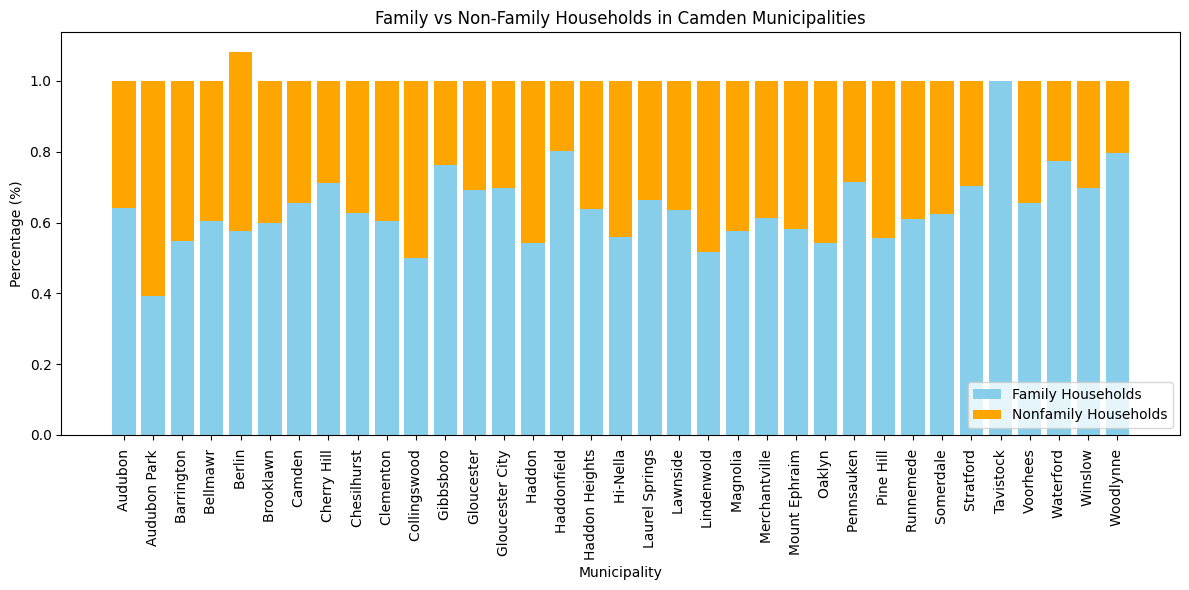

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load municipality data and clean names
njMun = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)
njMun.loc[:, 'Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Standardize and remove suffixes from municipality names
def clean_municipality_name(name):
    return re.sub(r'\s(Borough|Township|City|Village|Town)$', '', name, flags=re.IGNORECASE).strip().lower()

njMun['Municipality'] = njMun['Municipality'].apply(clean_municipality_name)

# Load and clean Family Households data
Family_Households = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
Family_Households['Family Households'] = Family_Households['Family Households'].replace({'%': '', ',': ''}, regex=True)
Family_Households['Family Households'] = pd.to_numeric(Family_Households['Family Households'], errors='coerce')
Family_Households = Family_Households.dropna(subset=['Family Households'])

# Load and clean Non-Family Household data
Nonfamily_Households = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')
Nonfamily_Households['Nonfamily Households'] = Nonfamily_Households['Nonfamily Households'].replace({'\$': '', ',': ''}, regex=True)
Nonfamily_Households['Nonfamily Households'] = pd.to_numeric(Nonfamily_Households['Nonfamily Households'], errors='coerce')
Nonfamily_Households = Nonfamily_Households.dropna(subset=['Nonfamily Households'])

# Merge Family and Non-Family Household data with njMun
combined_data = pd.merge(Family_Households[['Municipality', 'Family Households']],
                         Nonfamily_Households[['Municipality', 'Nonfamily Households']],
                         on='Municipality',
                         how='inner')

# Create a stacked bar chart for Family vs Non-Family Households across Municipalities
plt.figure(figsize=(12, 6))
plt.bar(combined_data['Municipality'], combined_data['Family Households'], label='Family Households', color='skyblue')
plt.bar(combined_data['Municipality'], combined_data['Nonfamily Households'], bottom=combined_data['Family Households'],
         label='Nonfamily Households', color='orange')

# Add labels and title
plt.xlabel('Municipality')
plt.ylabel('Percentage (%)')
plt.title('Family vs Non-Family Households in Camden Municipalities')
plt.xticks(rotation=90)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show();

#aok: why is berlin over 100? discuss and interpret results

**HOUSING AND INCOME AS INUS CONDITION FOR HOMELESSNESS**

In the context of homelessness, housing and income can act individually and collectively as Insufficient but Necessary parts of Unnecessary but Sufficient conditions that contribute to Homelessness. Alone, neither of them as necessarily causes homelessness, as individuals may have support systems or temporary aids such as Housing Assistance, and other social safety nets. This Bar Chart shows how other risk factors, when interacting, significantly increases the vulnerability to homelessness, and each factor could be necessary within a particular combination but not sufficient on its own.

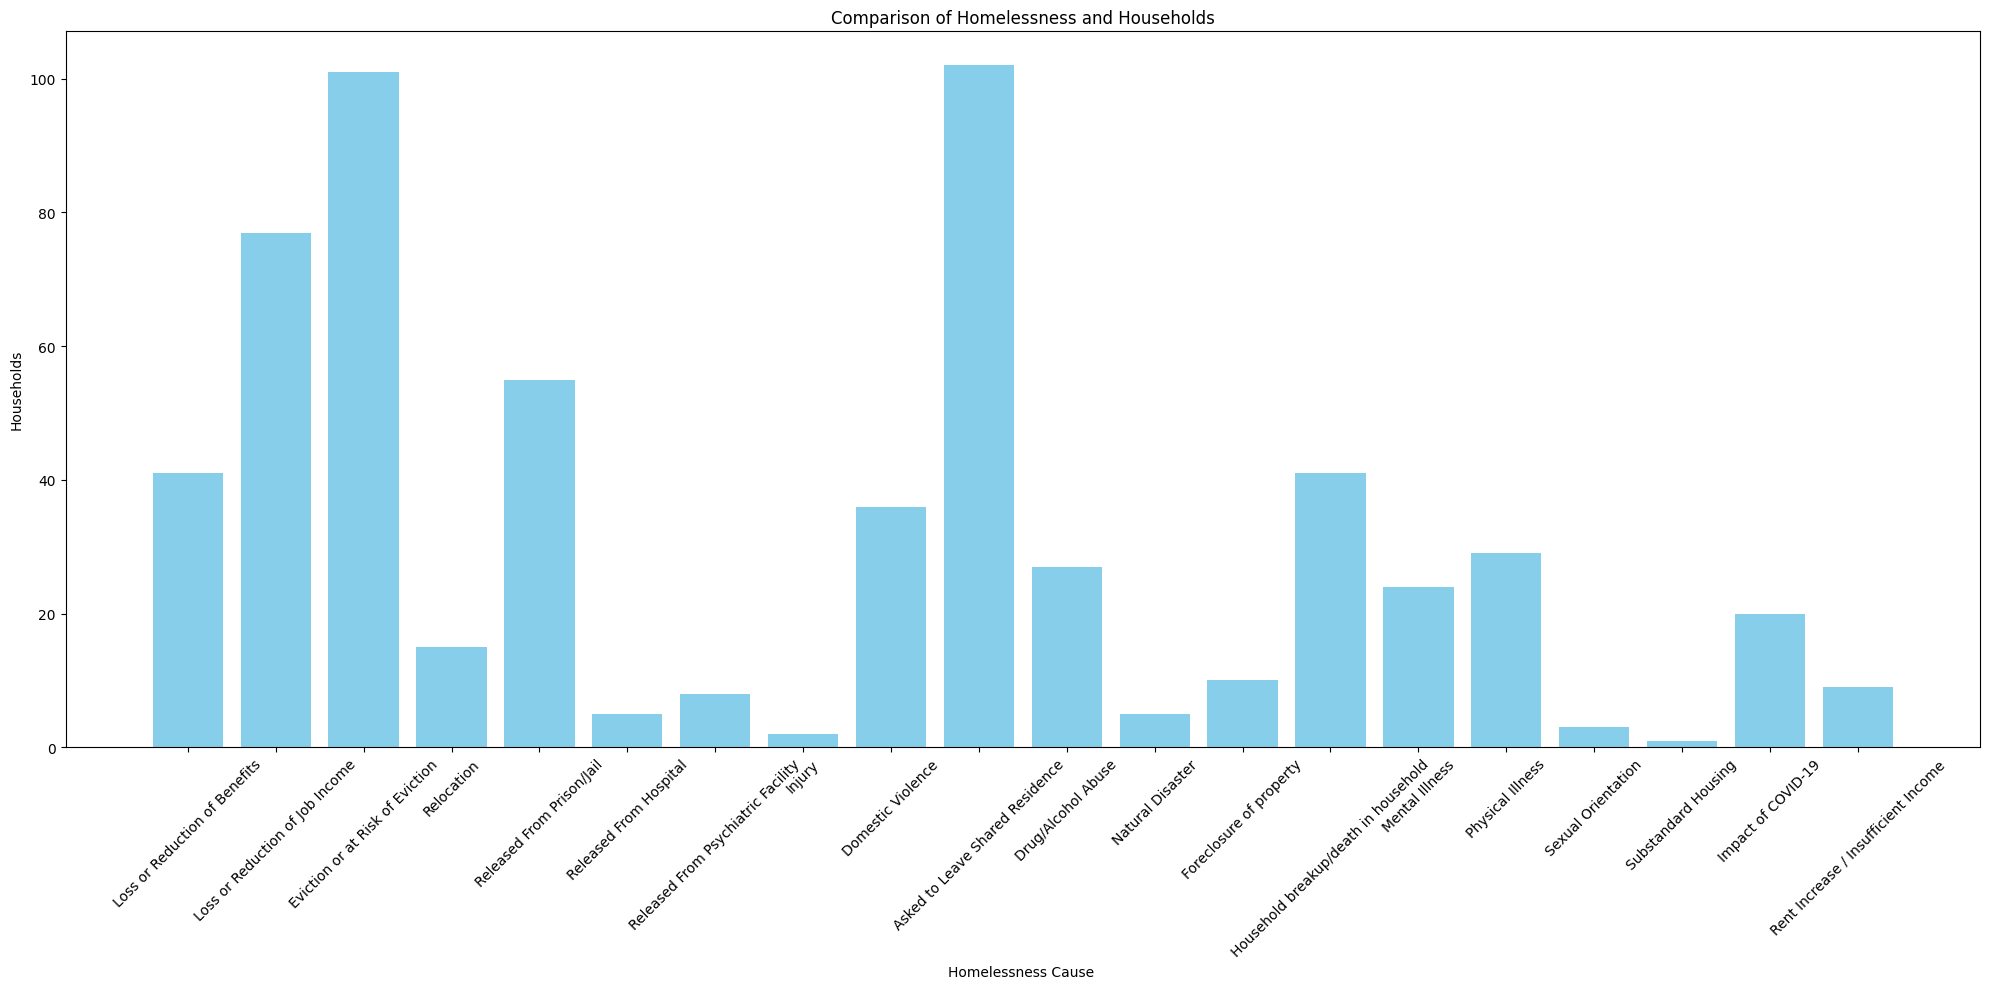

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided URL
url = 'https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/inus%20condition1.xlsx'
data = pd.read_excel(url)

# Display the first few rows to understand the data structure
#print(data.head())
# Plot a bar chart

plt.figure(figsize=(20,10))
plt.bar(data['Homelessness Cause '], data['Households'], color='skyblue')


#data[['Homelessness Cause ', 'Households']].plot(kind='bar', width=0.8)
plt.title('Comparison of Homelessness and Households')
plt.xlabel('Homelessness Cause ')
plt.ylabel('Households')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

#aok needs to be labelled better these labels dont point well to bars